# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10, get_CIFAR10_data
from sklearn.metrics import accuracy_score


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [4]:
data = get_CIFAR10_data()

X_train = data['X_train']  # (49000, 3, 32, 32)
y_train = data['y_train']  # (49000,)
X_val   = data['X_val']    # (1000, 3, 32, 32)
y_val   = data['y_val']
X_test  = data['X_test']   # (1000, 3, 32, 32)
y_test  = data['y_test']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

(49000, 3, 32, 32) (49000,)
(1000, 3, 32, 32) (1000,)
(1000, 3, 32, 32) (1000,)


In [ ]:
cifar10_dir = 'C:\\Users\\ruslk\\OneDrive\\Desktop\\classic\\DL_Course_SamU_2025\\lab_1-2\\cs231n\\datasets\\cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



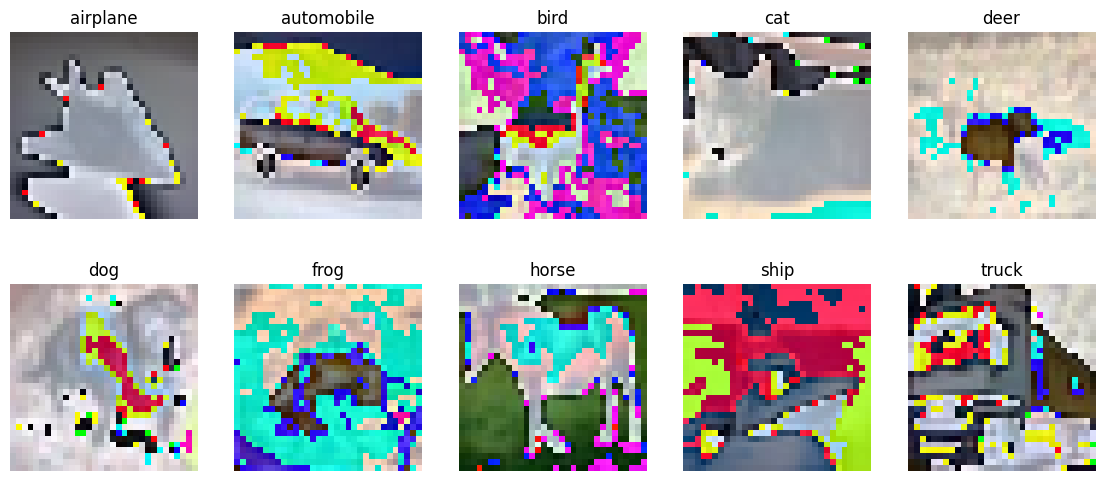

In [5]:
# классы CIFAR-10
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# возьмём по одному первому встречающемуся изображению каждого класса
samples = []

for class_id in range(10):
    idx = np.where(y_train == class_id)[0][0]  # первый индекс класса
    samples.append(X_train[idx])

# теперь samples содержит 10 картинок, по одной на каждый класс
plt.figure(figsize=(14, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # нужно вернуть каналы в последний индекс (из (3,32,32) → (32,32,3))
    img = samples[i].transpose(1, 2, 0)
    plt.imshow(img.astype('uint8'))
    plt.title(classes[i])
    plt.axis('off')

plt.show()


1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1)  # (49000, 3072)
X_test  = X_test.reshape(X_test.shape[0], -1)    # (1000, 3072)

print(X_train.shape)
print(X_test.shape)

(49000, 3072)
(1000, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [7]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [8]:
for k in [1, 3, 5, 7]:
    y_pred = classifier.predict(X_test, k=k, num_loops=0)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}: accuracy = {acc:.4f}")

k = 1: accuracy = 0.3460
k = 3: accuracy = 0.3270
k = 5: accuracy = 0.3480
k = 7: accuracy = 0.3260


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


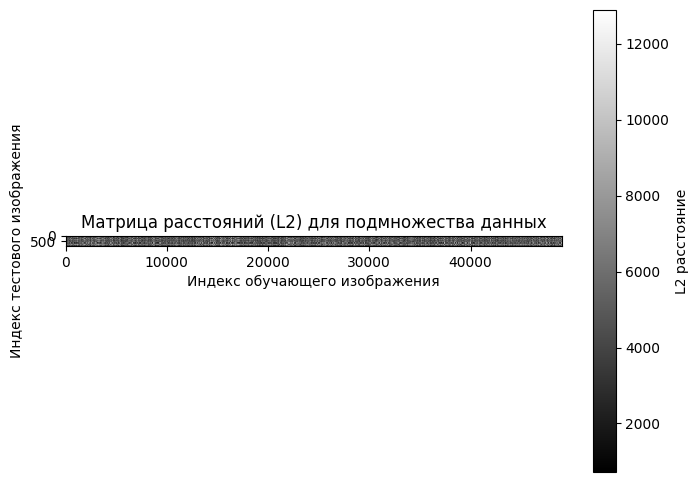

In [9]:
dists_vis = classifier.compute_distances_no_loops(X_test)

plt.figure(figsize=(8, 6))
im = plt.imshow(dists_vis, interpolation='nearest')
plt.title("Матрица расстояний (L2) для подмножества данных")
plt.xlabel("Индекс обучающего изображения")
plt.ylabel("Индекс тестового изображения")
plt.colorbar(im, label="L2 расстояние")
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [10]:
classifier.train(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)

print(f"Доля правильно классифицированных изображений (accuracy) при k={k}: {accuracy:.4f}")


Доля правильно классифицированных изображений (accuracy) при k=7: 0.3260


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

Считаем для k = 1...
  accuracy = 0.3460
Считаем для k = 3...
  accuracy = 0.3270
Считаем для k = 5...
  accuracy = 0.3480
Считаем для k = 7...
  accuracy = 0.3260
Считаем для k = 9...
  accuracy = 0.3360
Считаем для k = 11...
  accuracy = 0.3310
Считаем для k = 13...
  accuracy = 0.3320


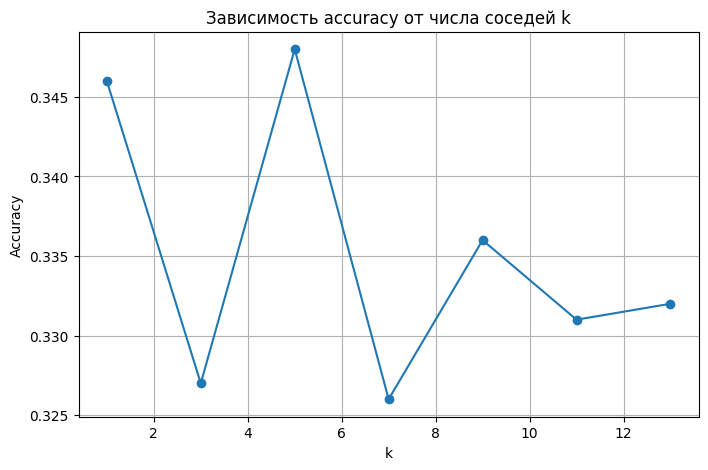

In [11]:
k_values = [1, 3, 5, 7, 9, 11, 13]
accuracies = []

for k in k_values:
    print(f"Считаем для k = {k}...")
    y_pred = classifier.predict(X_test, k=k, num_loops=0)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"  accuracy = {acc:.4f}")

# график зависимости accuracy(k)
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Зависимость accuracy от числа соседей k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [12]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat   = X_val.reshape(X_val.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

classifier.train(X_train_flat, y_train)

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
val_accuracies = {}

for k in k_values:
    y_val_pred = classifier.predict(X_val_flat, k=k, num_loops=0)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies[k] = acc
    print(f"k={k}: val accuracy={acc:.4f}")

best_k = max(val_accuracies, key=val_accuracies.get)

k=1: val accuracy=0.3570
k=3: val accuracy=0.3270
k=5: val accuracy=0.3260
k=7: val accuracy=0.3230
k=9: val accuracy=0.3080
k=11: val accuracy=0.3160
k=13: val accuracy=0.3060
k=15: val accuracy=0.3080



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [13]:
y_test_pred = classifier.predict(X_test_flat, k=best_k, num_loops=0)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy при k={best_k}: {test_acc:.4f}")

Test accuracy при k=1: 0.3460


1.11 Сделайте выводы по результатам 1 части задания.

Метод kNN позволяет получить работоспособную, но относительно слабую модель для классификации изображений CIFAR-10.
Он прост в реализации, но малоэффективен для задач с высокоразмерными данными и большим числом классов.
В следующих частях задания использование линейных моделей должно привести к более высокой точности.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [15]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val   = X_val.reshape(X_val.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (49000, 3072) (49000,)
Validation set: (1000, 3072) (1000,)
Test set: (1000, 3072) (1000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[ 1.18329437e-13 -4.01137627e-13  4.76085674e-13  2.68177970e-13
  4.96275529e-13 -2.09704073e-13 -3.23915842e-13  2.33928070e-14
 -4.05486148e-13  5.26406021e-13]


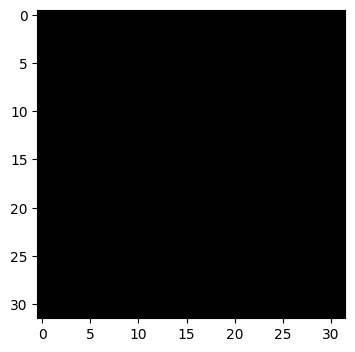

(49000, 3073) (1000, 3073) (1000, 3073)


In [15]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [16]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

num_dev = 500   # можно 1000, но 500 достаточно
X_dev = X_train[:num_dev]
y_dev = y_train[:num_dev]

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.364613
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [17]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -2.765777 analytic: -2.765777, relative error: 9.230259e-09
numerical: 0.712266 analytic: 0.712266, relative error: 6.614645e-08
numerical: -0.685705 analytic: -0.685705, relative error: 1.056009e-07
numerical: -2.147180 analytic: -2.147180, relative error: 1.504481e-09
numerical: -0.567008 analytic: -0.567008, relative error: 3.723068e-08
numerical: -1.664569 analytic: -1.664569, relative error: 5.075967e-09
numerical: 0.341569 analytic: 0.341569, relative error: 6.387179e-08
numerical: -3.177454 analytic: -3.177454, relative error: 1.131253e-08
numerical: 2.694674 analytic: 2.694674, relative error: 1.090681e-08
numerical: -2.465632 analytic: -2.465632, relative error: 1.662287e-11
numerical: -3.644552 analytic: -3.644552, relative error: 1.770648e-08
numerical: -0.406835 analytic: -0.406835, relative error: 1.553667e-07
numerical: 1.847593 analytic: 1.847593, relative error: 2.003202e-09
numerical: -0.205335 analytic: -0.205335, relative error: 2.061209e-07
numerical: 0.2

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [18]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.364613e+00 computed in 0.034492s
vectorized loss: 2.364613e+00 computed in 0.003513s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [19]:
from scripts.classifiers.linear_classifier import Softmax

softmax = Softmax()

loss_hist = softmax.train(
    X_train, y_train,
    learning_rate=1e-7,   # начнём с такого шага
    reg=2.5e4,            # и такой регуляризации
    num_iters=1500,
    batch_size=200,
    verbose=True
)

# Точность на train и val
y_train_pred = softmax.predict(X_train)
train_acc = np.mean(y_train_pred == y_train)
print("Train accuracy:", train_acc)

y_val_pred = softmax.predict(X_val)
val_acc = np.mean(y_val_pred == y_val)
print("Val accuracy:", val_acc)


iteration 0 / 1500: loss 390.375245
iteration 100 / 1500: loss 236.556021
iteration 200 / 1500: loss 143.831095
iteration 300 / 1500: loss 87.594450
iteration 400 / 1500: loss 53.831982
iteration 500 / 1500: loss 33.306389
iteration 600 / 1500: loss 20.987471
iteration 700 / 1500: loss 13.416908
iteration 800 / 1500: loss 9.021861
iteration 900 / 1500: loss 6.186273
iteration 1000 / 1500: loss 4.574092
iteration 1100 / 1500: loss 3.621158
iteration 1200 / 1500: loss 2.944262
iteration 1300 / 1500: loss 2.538201
iteration 1400 / 1500: loss 2.362787
Train accuracy: 0.3484897959183674
Val accuracy: 0.366


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [21]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

results = {}
best_val = -1.0
best_softmax = None
best_lr = None
best_reg = None

for lr in learning_rates:
    for reg in regularization_strengths:
        print(f"Training softmax with lr={lr}, reg={reg}")
        softmax = Softmax()
        loss_hist = softmax.train(
            X_train, y_train,
            learning_rate=lr,
            reg=reg,
            num_iters=1500,
            batch_size=200,
            verbose=False
        )

        y_train_pred = softmax.predict(X_train)
        train_acc = np.mean(y_train_pred == y_train)

        y_val_pred = softmax.predict(X_val)
        val_acc = np.mean(y_val_pred == y_val)

        results[(lr, reg)] = (train_acc, val_acc)
        print(f"  train_acc = {train_acc:.4f}, val_acc = {val_acc:.4f}")

        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax
            best_lr = lr
            best_reg = reg

print("\nЛучшие гиперпараметры:")
print("  learning_rate =", best_lr)
print("  reg           =", best_reg)
print("  best val_acc  =", best_val)

y_test_pred = best_softmax.predict(X_test)
test_acc = np.mean(y_test_pred == y_test)
print("Test accuracy with best softmax:", test_acc)



Training softmax with lr=1e-07, reg=25000.0
  train_acc = 0.3457, val_acc = 0.3560
Training softmax with lr=1e-07, reg=50000.0
  train_acc = 0.3312, val_acc = 0.3390
Training softmax with lr=5e-05, reg=25000.0
  train_acc = 0.0968, val_acc = 0.0770
Training softmax with lr=5e-05, reg=50000.0
  train_acc = 0.1001, val_acc = 0.0980

Лучшие гиперпараметры:
  learning_rate = 1e-07
  reg           = 25000.0
  best val_acc  = 0.356
Test accuracy with best softmax: 0.344


3.10 Сделайте выводы по третьей части задания

Третья часть задания показала, что даже простая линейная модель (Softmax + SGD) способна обучаться на CIFAR-10 и достигать качества около 36%, если данные правильно нормализованы и подобраны гиперпараметры. Реализация функции потерь, градиента и SGD подтверждена численными методами и работает корректно.